In [115]:
import pandas as pd
df=pd.read_csv('NetflixOriginals.csv',encoding="ISO-8859-1")
df.head(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [116]:
df.describe() #Veri setinde outlier, NaN yok

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [117]:
df[['Title','Runtime','Language']].sort_values(by='Runtime',ascending=False).head(10)

,Title,Runtime,Language
561,The Irishman,209,English
328,Da 5 Bloods,155,English
581,Springsteen on Broadway,153,English
247,Citation,151,English
284,The Forest of Love,151,Japanese
509,Raat Akeli Hai,149,Hindi
7,The Last Days of American Crime,149,English
543,Ludo,149,Hindi
194,Army of the Dead,148,English
5,Drive,147,Hindi


<AxesSubplot:title={'center':'Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?'}, xlabel='Language'>

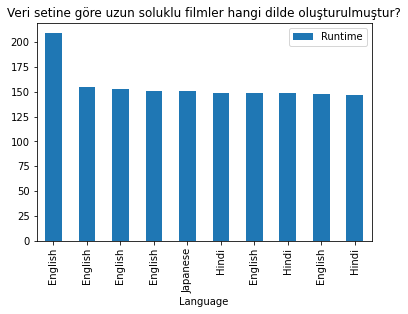

In [118]:
df[['Title','Runtime','Language']].sort_values(by='Runtime',ascending=False).head(10).plot.bar(x='Language',title='Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?')

2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [119]:
dfd=df[(df['Genre']=='Documentary')&(df['Premiere'].str[-4:]=='2019')]
dfd1=df[(df['Premiere'].str[-4:]=='2020')&(df['Premiere'].str.match('January|February|March|April|May|June'))]
dfd_doc=pd.concat([dfd,dfd1])
dfd_doc[['Title','IMDB Score','Premiere','Genre']]

,Title,IMDB Score,Premiere,Genre
0,Enter the Anime,2.5,"August 5, 2019",Documentary
15,After the Raid,4.3,"December 19, 2019",Documentary
20,"Hello Privilege. It's Me, Chelsea",4.4,"September 13, 2019",Documentary
30,After Maria,4.6,"May 24, 2019",Documentary
111,Ghosts of Sugar Land,5.5,October 16. 2019,Documentary
...,...,...,...,...
555,Crip Camp: A Disability Revolution,7.7,"March 25, 2020",Documentary
558,Road to Roma,7.7,"February 11, 2020",Making-of
563,A Secret Love,7.9,"April 29, 2020",Documentary
572,Disclosure: Trans Lives on Screen,8.2,"June 19, 2020",Documentary


İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [120]:
df[['Genre','Language','IMDB Score']][df['Language']=='English'].sort_values(by=['IMDB Score'],ascending=False).head(1)

,Genre,Language,IMDB Score
583,Documentary,English,9.0


'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [121]:
df_h=df[df['Language']=='Hindi']
df_h['Runtime'].mean()

115.78787878787878

'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [122]:
df.groupby(by=['Genre']).count().sort_values(by='Title',ascending=False)

,Title,Premiere,Runtime,IMDB Score,Language
Genre,,,,,
Documentary,159,159,159,159,159
Drama,77,77,77,77,77
Comedy,49,49,49,49,49
Romantic comedy,39,39,39,39,39
Thriller,33,33,33,33,33
...,...,...,...,...,...
Coming-of-age comedy-drama,1,1,1,1,1
Comedy/Horror,1,1,1,1,1
Comedy/Fantasy/Family,1,1,1,1,1


Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [123]:
df.groupby(by='Language').count().sort_values(by='Title',ascending=False).head(3)

,Title,Genre,Premiere,Runtime,IMDB Score
Language,,,,,
English,401,401,401,401,401
Hindi,33,33,33,33,33
Spanish,31,31,31,31,31


IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [124]:
df[['Title','IMDB Score']].sort_values(by='IMDB Score',ascending=False).head(10)	

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [125]:
import numpy as np
cor = np.corrcoef(df['Runtime'], df['IMDB Score'])
cor #korelasyon neredeyse yok

array([[ 1.        , -0.04089629],
       [-0.04089629,  1.        ]])

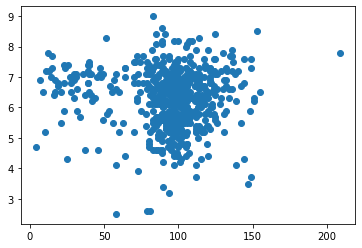

In [126]:
import matplotlib.pyplot as plt
plt.scatter(df['Runtime'], df['IMDB Score'])
plt.show()

IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [127]:
df[['Genre','IMDB Score']].sort_values(by=['IMDB Score'],ascending=False).head(10)

,Genre,IMDB Score
583,Documentary,9.0
582,Documentary,8.6
581,One-man show,8.5
580,Documentary,8.4
579,Concert Film,8.4
578,Concert Film,8.4
577,Documentary,8.3
576,Documentary,8.3
573,Animation/Christmas/Comedy/Adventure,8.2
571,Documentary,8.2


'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [128]:
df.sort_values(by='Runtime',ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
5,Drive,Action,"November 1, 2019",147,3.5,Hindi


<AxesSubplot:title={'center':"'Runtime' değeri en yüksek olan ilk 10 film hangileridir?"}, xlabel='Title'>

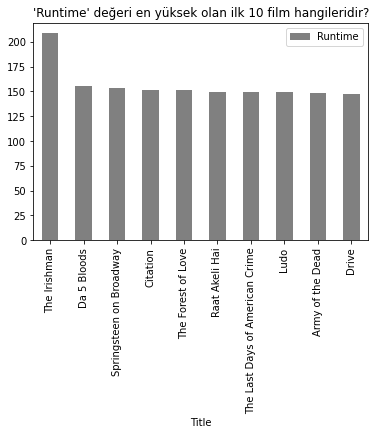

In [129]:
df.sort_values(by='Runtime',ascending=False).head(10).plot.bar(x='Title',y='Runtime',color='gray',title="'Runtime' değeri en yüksek olan ilk 10 film hangileridir?")

Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [130]:
df['Premiere'] = df['Premiere'].str[-4:]
dff=df[['Premiere','Title']].groupby(['Premiere']).count().sort_values('Title',ascending=False)
dff

,Title
Premiere,
2020,183
2019,125
2018,99
2021,71
2017,66
2016,30
2015,9
2014,1


<AxesSubplot:xlabel='Years', ylabel='Count'>

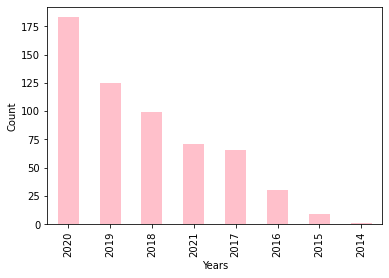

In [131]:
dff.plot.bar(xlabel='Years',ylabel='Count',color='pink',legend=None)

Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [132]:
df[['IMDB Score','Language']].groupby('Language').mean().sort_values(by='IMDB Score').head(1)

,IMDB Score
Language,
Malay,4.2


<AxesSubplot:xlabel='Language'>

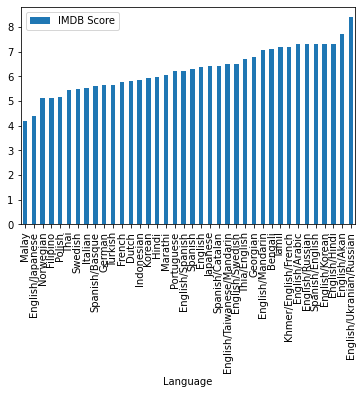

In [133]:
df[['IMDB Score','Language']].groupby('Language').mean().sort_values(by='IMDB Score').plot.bar()

Hangi yılın toplam "runtime" süresi en fazladır?

In [134]:
df[['Runtime','Premiere']].groupby(['Premiere']).sum().sort_values('Runtime',ascending=False).head(1)

,Runtime
Premiere,
2020,17384


Her bir dilin en fazla kullanıldığı "Genre" nedir

In [135]:
df.groupby(['Language','Genre']).count()

Title  Premiere  Runtime  IMDB Score
Language     Genre                                                
Bengali      Documentary          1         1        1           1
Dutch        Crime drama          1         1        1           1
             Fantasy              1         1        1           1
             Romantic comedy      1         1        1           1
English      Action               4         4        4           4
...                             ...       ...      ...         ...
Thai         Horror               1         1        1           1
Thia/English Documentary          1         1        1           1
Turkish      Comedy               2         2        2           2
             Drama                2         2        2           2
             Romance              1         1        1           1

[204 rows x 4 columns]